1. Visualize images and associated captions

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO
import nltk
from torchvision import transforms
import torch
import nltk
#nltk.download('punkt')
#nltk.download('punkt_tab')

In [ ]:
base_path = '/home/BTECH_7TH_SEM/Desktop/VII Sem/MML/MS-COCO'
image_path = os.path.join(base_path, 'val2017')
annotation_path = os.path.join(base_path, 'annotations_trainval2017', 'annotations', 'captions_val2017.json')

In [ ]:
coco_caps = COCO(annotation_path)

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!


In [ ]:
selected_image_filename = '000000030785.jpg'
img_full_path = os.path.join(image_path, selected_image_filename)

In [ ]:
img_meta_list = coco_caps.loadImgs(coco_caps.getImgIds())
img_meta = next((item for item in img_meta_list if item['file_name'] == selected_image_filename), None)

if img_meta is None:
    raise ValueError(f"Image {selected_image_filenme} not found in COCO annotations.")

In [ ]:
ann_ids = coco_caps.getAnnIds(imgIds=img_meta['id'])
anns = coco_caps.loadAnns(ann_ids)
caption = anns[0]['caption']

2. Process text (tokenization) and images (resing, noramlization)

In [ ]:
tokens = nltk.word_tokenize(caption.lower())
print("Original Caption:", caption)
print("Takenized Caption:", tokens)

Original Caption: A plate filled with a bowl of vegetables and two slices of bread with a spread on them.
Takenized Caption: ['a', 'plate', 'filled', 'with', 'a', 'bowl', 'of', 'vegetables', 'and', 'two', 'slices', 'of', 'bread', 'with', 'a', 'spread', 'on', 'them', '.']


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image = Image.open(img_full_path).convert('RGB')
processed_image = transform(image)
print("Processed Image Shape:", processed_image.shape)

Processed Image Shape: torch.Size([3, 224, 224])


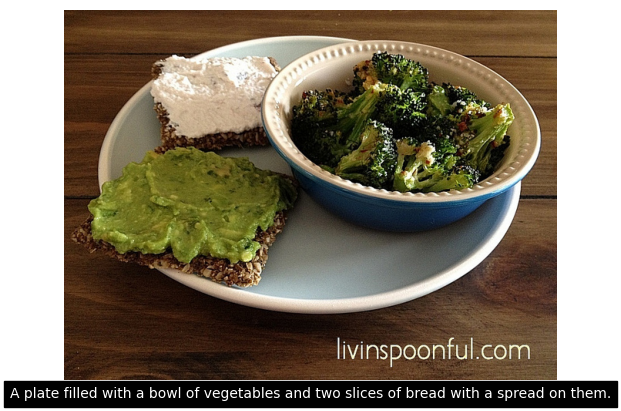

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.text(0.5, -0.05, caption,
         color='white',
         backgroundcolor='black',
         ha='center',
         transform=plt.gca().transAxes
        )
plt.show()